<center><img src="https://i.imgur.com/tunvxE1.png" width="400" alt="ClearML" align="right" /> </center>
<br>
<p><font size="3" face="Arial" font-size="large"><ul type="square">
    
<li><a href="#c1">🔑 Ключевые особенности  </a></li>
<li><a href="#c2">📲 Регистрация учетной записи и вход в систему </a></li>
<li><a href="#c32">🧠 Основные правила логирования в ClearML </a></li>
<li>
        <a href="#c33">✍️ Залогируем эксперимент с обучением нейронки ⚡️`</a>
        <ul class="sublist">
            <li><a href="#qstart">🚀 Подключаем магию ClearML 🧙 </a></li>
            <li><a href="#c6">🐘 Готовим данные для обучения модели</a>
            <li><a href="#c41"> 🖼 Логирование графики</a>
            <li><a href="#c51"> 🪓 Интегрируем ClearML в цикл обучения модели (train loop) 🎢 </a>
        </ul>
    </li>
<li><a href="#c4">✌️ Как сравнить два эксперимента 🧐</a>
<li><a href="#c5">📝 Подведём итоги </a>

</li></ul></font></p>

# На что способен ClearML? 

<img src="../images/MLexp1.png" width="500" alt="ClearML" align="right" />

`ClearML` - фреймворк нацеленный на упрощение ваших действий. Начиная с работы с данными и заканчивая построением pipeline'ов обучения. Также он умеет логировать ваши эксперименты, оптимизировать гиперпараметры и хранить код! **Один из самых простых в использовании!**


# <center id="c1">🔑 Ключевые особенности 👍</center>

<div class="alert alert-info">

* 🃏 Вы только обучаете модель - все остальное за вас делает `ClearML`.
* 📈 Резульаты EDA сохраняюся в графиках на странице запуска проекта
* 🔥 Позволяет отслеживать работу вашего pipeline'a в режиме реального времени 
* 💪 Не надо задумываться, что сохранять - будет сохранено буквально все, что возможно, автоматически. 
* 🧩 Сохраняется даже окружение ноутбука - получаем воспроизводимое решение, которое можем сразу передавать коллегам.
* 🚀 Мощная система мониторинга ClearML подключается всего в 2 строчки кода.

# <center id="c2"> 📲 Регистрация учетной записи и вход в систему </center>
<div class="alert alert-info">
    
Для того, чтобы воспользоваться возможностью логировать ваш эксперимент на сервер вам нужно зарегистрироваться на сайте проекта и создать уникальный ключ API.
    
1. Если у вас нет учетной записи `ClearML`, вы можете перейти на https://app.clear.ml/login/ и создать бесплатную учетную запись.
2. После успешной регистрации создаете новый секрет: https://app.clear.ml/settings/workspace-configuration

In [25]:
# Установка clearml и других нужных нам библиотек
!pip install clearml torch tensorboard torchview -q

## 👇 Ячейка ниже для локального запуска в `Jupyter Notebook`

In [3]:
from getpass import getpass
# Введите поочерёдно полученные ключи в появившемся окне (код изменять не нужно)
access_key = getpass(prompt="Введите API Access токен: ")
secret_key = getpass(prompt="Введите API Secret токен: ")

Введите API Access токен:  ········
Введите API Secret токен:  ········


Чтобы `ClearML` заработал в нашем проекте, нужно добавить значения в переменные среды операционной системы.

In [4]:
%%capture
#  Не показывать свои api-ключи
%env CLEARML_WEB_HOST=https://app.clear.ml/
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml

%env CLEARML_API_ACCESS_KEY=$access_key
%env CLEARML_API_SECRET_KEY=$secret_key

<div class="alert alert-success">

Теперь аргументы командной строки, вывод консоли, а также **Tensorboard** и **Matplotlib** будут автоматически регистрироваться в пользовательском интерфейсе **ClearML** под созданной задачей. Устройтесь поудобнее, расслабьтесь и наблюдайте, как ваши модели логируются в одном месте :)

##  👇 Аналогичные ячейки, но для запуске в `Kaggle kernel` 

<div class="alert alert-info">

На `Kaggle` можно авторизоваться в `ClearML` двумя способами:

1. С помощью `!clearml-init`. Он запросит секрет, который вы можете скопировать + вставить.
2. Используя `Kaggle secrets` для хранения ключа API и использовать приведенный ниже фрагмент кода для входа в систему. Прочтите это [обсуждение](https://www.kaggle.com/product-feedback/114053), чтобы узнать больше о Kaggle secrets. В этом случае удобно будет скопировать код из раздела `Jupyter Notebook`

<div class="alert alert-info">
    
```
from kaggle_secrets import UserSecretsClient
from clearml import Task

user_secrets = UserSecretsClient()
clearml_key = user_secrets.get_secret("clearml_key") 
clearml_secret = user_secrets.get_secret("clearml_secret") 
Task.set_credentials(
     api_host="https://api.clear.ml",
     web_host="https://app.clear.ml",
     files_host="https://files.clear.ml",
     key=clearml_key,
     secret=clearml_secret
)
```
[Подробнее о входе в ClearML.](https://clear.ml/docs/latest/docs/getting_started/ds/ds_first_steps)

# <center id="c32"> 🧠 Логирование в `ClearML` 👩‍🏫 <center> 

<div class="alert alert-info">

В `ClearML` существует 3 сущности для логирования:
* `Task` -  модуль, с помощью которого создается эксперимент и подгружаются гиперпараметры
* `Logger` - подгрузка данных. Таблицы, звук, картинки и тд.
* `Pipeline` - построение автоматизированных решений. __(Пока_не_рассматриваем)__

<div class="alert alert-success">

__Для логирования параметров запуска__:
```python
task.connect(
    cfg_dict, # Словарь параметров (поддерживает не только параметры, но рекоммендуем словарь)
    "name_of_config", # Название параметров (модели, датасета и тд)
);
```

<div class="alert alert-success">

__Сохранение датасетов__:
Необходимо сначала получить класс `Logger` после инициализации эксперимента
```python
logger = Logger.current_logger()
```


Далее вызываем метод `report_table`:
```python
logger.report_table(
    title='name_of_data', # Как называется ваш датасет
    series='type_of_data', # Тип данных (train_data, feature_importance)
    table_plot=pd_dataframe, # Что репортим
)
```

<div class="alert alert-success">

__Если необходимо сохранить скалярную величину, можно воспользоваться двумя методами__:
* `report_scalar` - когда нужно логировать какую-либо скалярную величину в процессе обучения (например метрику или лосс), автоматически строится график изменения этой величины на вкладке `scalars` в UI.
```python
logger.report_scalar(
    title='Loss', # За что отвечает 
    series='Train',
    value=your_value,
    iteration=your_iteration
)
```
* `report_single_value` - когда нужно залогировать одно значение, например, финальное значение метрики. Значение отразится на вкладке `scalars` UI в таблице `Summary`.
```python
logger.report_single_value(
    name='ACC',
    value=accuracy
)
```

**Пример на картинке:**

<img src='../images/scalars.png'>

Также если вы решаете не табличную задачу, а например задачу компьютерного зрения - у `ClearML` есть возможности сохранения картинок и другого рода данных с ними можно [ознакомиться здесь](https://clear.ml/docs/latest/docs/guides/reporting/explicit_reporting#)

# <center id="c33"> ✍️ Залогируем эксперимент с обучением нейронки ⚡️<center>

### Настраиваем всё для обучения

In [1]:
import copy
from dataclasses import asdict, dataclass

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter

In [2]:
# Для корректного отображения схемы нейронки
import graphviz

graphviz.set_jupyter_format("png")

'svg'

In [3]:
# Создаём класс Config для удобного обращения к гиперпараметрам будущей нейронки
# можно попробовать поэкспериментировать с параметрами
@dataclass
class CFG:
    project_name: str = "ML Instruments Course"
    experiment_name: str = "PyTorch model baseline"

    train_name: str = "quickstart_train.csv"
    seed: int = 2024
    device: str = "cuda" if torch.cuda.is_available() else "cpu"
    hidden_size: int = 128
    dropout: float = 0.1
    lr: float = 1e-3
    batch_size: int = 128
    num_workers: int = 2
    epochs: int = 20


# Чтобы сохранить конфигурацию текущего эксперимента, перенесём её в словарь cfg_dict
cfg = CFG()
cfg_dict = asdict(cfg)
cfg_dict

{'project_name': 'ML Instruments Course',
 'experiment_name': 'PyTorch model baseline',
 'train_name': 'quickstart_train.csv',
 'seed': 2024,
 'device': 'cuda',
 'hidden_size': 128,
 'dropout': 0.1,
 'lr': 0.001,
 'batch_size': 128,
 'num_workers': 4,
 'epochs': 20}

In [4]:
# ВАЖНО! - для воспроизводимости эксперимента
def seed_everything(seed=2024):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(cfg.seed)

## <center id="qstart">🚀 Подключаем магию ClearML 🧙<center>

In [5]:
from clearml import Task, Logger

In [6]:
cfg.project_name, cfg.experiment_name

('ML Instruments Course', 'PyTorch model baseline')

In [7]:
# Создаем эксперимент
task = Task.init(
    project_name=cfg.project_name,  # Задаем имя проекта/соревнования
    task_name=cfg.experiment_name,  # С чем экспериментируем
)
task.add_tags(
    ["baseline", "model"]
)  # Рекомендуем добавлять тэги запусков: feature_engineering, model_tuning и тд

logger = Logger.current_logger()

ClearML Task: created new task id=f1a3c6e62fbc444ea871de2a75aaf237
2025-02-25 21:26:14,263 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/bdd05cad4ec5423db5b05d82c22e17b4/experiments/f1a3c6e62fbc444ea871de2a75aaf237/output/log
ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


<div class="alert alert-success" style="display: flex; justify-content: space-between; align-items: center;">

<div style="text-align: left;">
🤯 И все!    

Это все, что необходо для логирования эксперимента с помощью `ClearML`!    
Остальное нужно для подгрузки данных, метрик и конфигов.

</div>

<img src="https://i.imgur.com/1yWdGIO.png" align="right"  style="height: auto;">

</div>

<div class="alert alert-success">
    
Несмотря на особенность `ClearML` логировать все автоматически - он не сохранит ваши гиперпараметры и данные.

In [8]:
# Сохраняем в нашу task'у словарь с параметрами эксперимента
task.connect(
    cfg_dict,  # Лучше всего передавать словарь
    "Basic Config",  # Комментарий, что подгружаем
);

## <center id="c6"> 🐘 Готовим данные для обучения модели ⚡<center>

<div class="alert alert-info">
    
Если вы уже проходили наш курс по [`Соревновательному DS`](https://stepik.org/a/108888), то вам знаком этот датасет и код нейросетки. Если нет, то это датасет с поездками автомобилей каршеринговой компании. 

**В датасете 2 таргета:** время до поломки (регрессионный) и вид ожидаемой поломки (классификация).

In [9]:
## 🤹 Подгружаем dataset
github_url = "https://github.com/a-milenkin/ml_instruments/raw/refs/heads/main/data/quickstart_train.csv"
rides_info = pd.read_csv(github_url)
rides_info.head(3)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,4.737759,1.214131e+07,0.1,180.855726,0.023174,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,electro_bug,4.480517,1.803909e+07,0.0,187.862734,12.306011,174,174
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,34.93,gear_stick,4.768391,1.588366e+07,0.1,102.382857,2.513319,174,173


In [10]:
# Залогируем наш исходный датасет, если он будет очень большим, лучше так не делать!
logger.report_table(
    title="Start data",  # Название таблицы или метрика, получаемая на этих данных :)
    series="datasets",  # В каком разделе будут сохранены данные
    table_plot=rides_info,  # DataFrame, csv, ссылка на csv
)

In [11]:
# Проводим препроцессинг данных для старта обучения
drop_cols = ["car_id", "target_reg", "target_class"]
cat_cols = ["car_type", "fuel_type", "model"]
rides_info_cat = pd.get_dummies(rides_info, columns=cat_cols)
rides_info_cat.fillna(rides_info.median(numeric_only=True), inplace=True)
num_cols = [col for col in list(rides_info_cat.columns) if col not in drop_cols]

In [12]:
# нормализуем данные и кодируем таргет
scaler = RobustScaler()
le = LabelEncoder()

df = scaler.fit_transform(rides_info_cat[num_cols])
df = pd.DataFrame(df, columns=num_cols)

target_scaler = RobustScaler()
target = target_scaler.fit_transform(rides_info["target_reg"].values.reshape(-1, 1))

df["target_reg"] = target
df["target_class"] = le.fit_transform(rides_info["target_class"]).reshape((-1, 1))

In [13]:
# теперь залогируем датасет после препроцессинга
logger.report_table(title="Transformed data", series="datasets", table_plot=rides_info)

In [14]:
train, test = train_test_split(df)

In [15]:
# Также залогируем данные, чтобы не было путанницы в версиях датасетов

cfg.num_features = train.shape[1] - 2  # количество фичей, подаваемое на вход
cfg.num_tar_class = (
    train.target_class.nunique()
)  # количество выходов равно количеству предсказываемых классов

logger.report_table(title="Transformed data", series="datasets", table_plot=rides_info)

logger.report_table(title="Train data", series="datasets", table_plot=train)

logger.report_table(title="Test data", series="datasets", table_plot=test)

[]

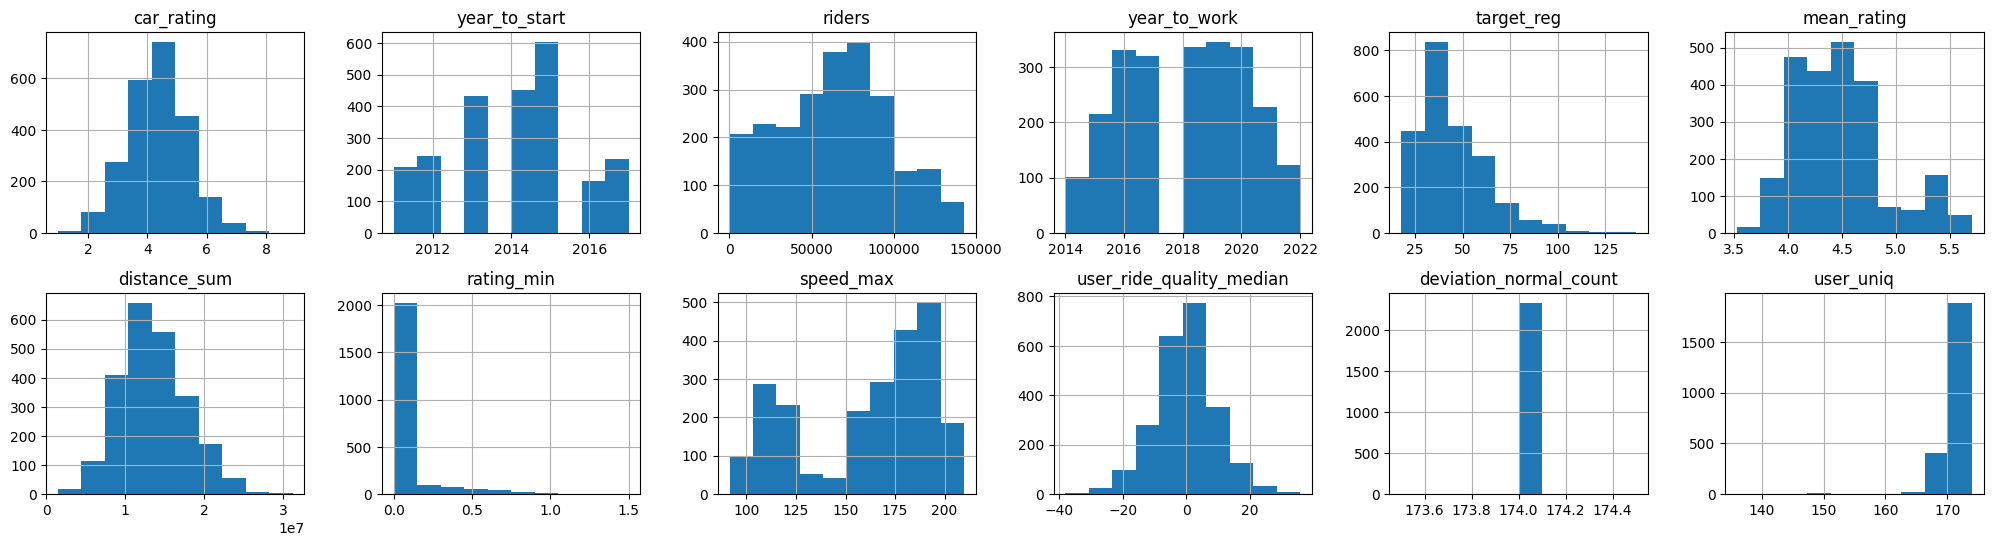

In [16]:
rides_info.hist(figsize=(25, 6), layout=(-1, 6))
plt.plot()

## <center id="c41"> 🖼 Логирование графики <center>

<div class="alert alert-info">

Ещё одна фишка **ClearML** - это автоматическое логирование графики **Matpltlib** и **Seaborn**:
* Любой вызов `plt.show()` логируется без дополнительного кода и графики отображаются на вкладке `Plots`
* Так же можно логировать графику с использованием специального метода, но она отобразится на вкладке `Debug Samples`
  ```python
  logger.report_matplotlib_figure(
        title="Class Balance",
        series="Plot as an image",
        iteration=0,
        figure=plt,
        report_image=True)
  ```

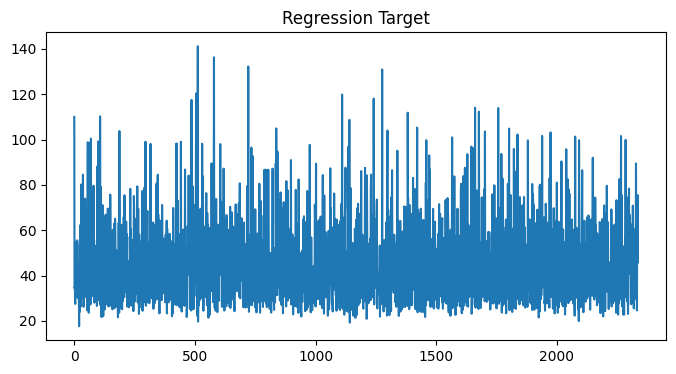

In [17]:
# Посмотрим для примера, как залогируется такой график
plt.figure(figsize=(8, 4))
rides_info["target_reg"].plot()
plt.title("Regression Target")
plt.show()

# <center> Задаем архитектуру сетки и класс датасета </center>

<div class="alert alert-info">
    
Создаём класс `Dataset` для `PyTorch`

In [18]:
# датасет выдает фичи и значения целевых переменных
class Rides(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx, :]

        data = row.drop(labels=["target_reg", "target_class"])
        data = torch.FloatTensor(data.values.astype("float"))
        tar_reg = torch.tensor(row["target_reg"]).float()
        tar_class = row["target_class"].astype("int")

        return data, tar_reg, tar_class

In [19]:
train_datasets = {"train": Rides(train), "val": Rides(test)}

In [20]:
dataloaders_dict = {
    x: torch.utils.data.DataLoader(
        train_datasets[x],
        batch_size=cfg.batch_size,
        shuffle=True,
        num_workers=cfg.num_workers,
    )
    for x in ["train", "val"]
}

<div class="alert alert-info">
    
Возьмем пример на архитектуре мультислойного перцептрона на `PyTorch` для двух таргетов 

In [21]:
class TabularNN(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # Напишем простенькую нейронку
        self.mlp = nn.Sequential(
            nn.Linear(cfg.num_features, cfg.hidden_size),
            # nn.BatchNorm1d(cfg.hidden_size),
            nn.Dropout(cfg.dropout),
            nn.ReLU(),
            nn.Linear(cfg.hidden_size, cfg.hidden_size),
            # nn.BatchNorm1d(cfg.hidden_size),
            nn.Dropout(cfg.dropout),
            nn.ReLU(),
            nn.Linear(cfg.hidden_size, cfg.hidden_size // 2),
        )
        # Так как два таргета, делаем две головы - одна для регрессии, другая - классификации
        self.regressor = nn.Sequential(nn.Linear(cfg.hidden_size // 2, 1))
        self.classifier = nn.Sequential(
            nn.Linear(cfg.hidden_size // 2, cfg.num_tar_class)
        )

    def forward(self, data):
        x = self.mlp(data)
        tar_reg = self.regressor(x)
        tar_class = self.classifier(x)
        return tar_reg.view(-1), tar_class

In [23]:
model = TabularNN(cfg).to(cfg.device)

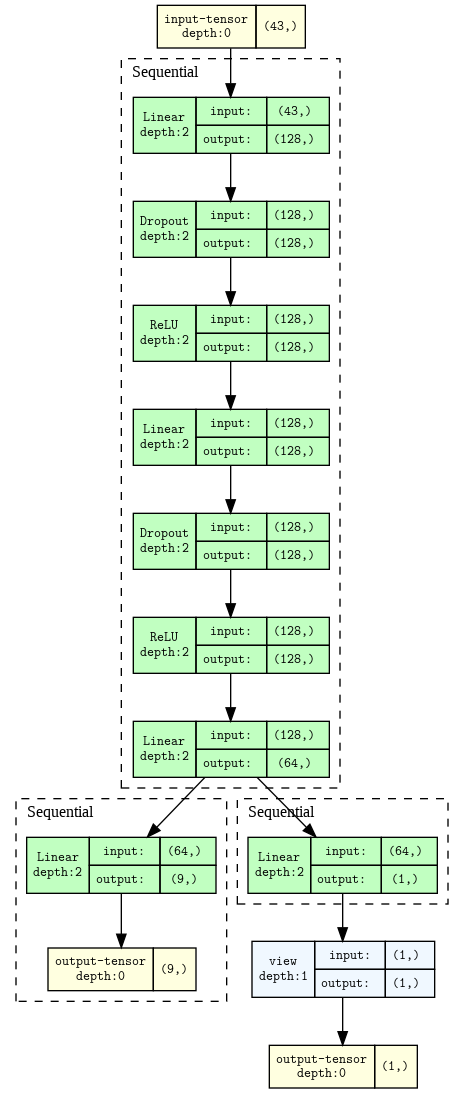

In [26]:
# Посмотрим визуально какая модель у нас получилась
from torchview import draw_graph # метод для визуализации архитектуры

model_graph = draw_graph(
    TabularNN(cfg), input_size=[cfg.num_features], expand_nested=True
)
model_graph.visual_graph

# <center id="c51"> 🪓 Интегрируем ClearML в цикл обучения (train loop) 🎢 <center>

<div class="alert alert-warning">

По дефолту `ClearML` не умеет работать с чистым **PyTorch**, поэтому для отображения метрик на этапе обучения модели мы будем использовать `TensorBoard` и писать в него все значения. А его уже умеет перехватывать `ClearML`.

<div class="alert alert-warning">
    
[Далее в курсе](https://stepik.org/lesson/1466624/step/1) мы рассмотрим более продвинутый инструмент с бесшовной интеграцией с `ClearML`.

In [27]:
# Задаем оптимизатор и два лосса - для разных таргетов
optimizer = torch.optim.Adam(model.parameters(), lr=cfg.lr)
regression_criterion = nn.MSELoss().to(cfg.device)
classification_criterion = nn.CrossEntropyLoss().to(cfg.device)

# Инициализируем объект класса SummaryWriter, который будет отвечать за логирование в нашем train loop.
writer = SummaryWriter()

In [28]:
def train_model(
    model,
    dataloaders,
    regression_criterion,
    classification_criterion,
    optimizer,
    num_epochs=25,
    early_stopping_rounds=5,
    verbose=2,
):

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = np.inf
    early_steps = 0
    stop = False

    for epoch in range(num_epochs):
        if stop:
            break
        if epoch % verbose == 0:
            print("Epoch {}/{}".format(epoch, num_epochs - 1))
            print("-" * 10)

        # В каждой эпохе учимся на train и валидируемся на val
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Обучаем модельку
            else:
                model.eval()  # Тестируем ее

            running_loss = 0.0

            for inputs, labels_1, labels_2 in dataloaders[phase]:
                inputs = inputs.to(cfg.device)
                labels_1 = labels_1.to(cfg.device)
                labels_2 = labels_2.to(cfg.device)

                optimizer.zero_grad()

                # Включаем градиенты только на этапе обучения
                with torch.set_grad_enabled(phase == "train"):
                    outputs_1, outputs_2 = model(inputs)
                    loss_1 = regression_criterion(outputs_1, labels_1)
                    loss_2 = classification_criterion(outputs_2, labels_2)

                    loss = loss_1 + loss_2

                    # ‼️ Записываем результаты в TensorBoard для логирования в ClearML ‼️
                    writer.add_scalar(f"Loss1/{phase.title()}", loss_1, epoch)
                    writer.add_scalar(f"Loss2/{phase.title()}", loss_2, epoch)
                    writer.add_scalar(f"Loss/{phase.title()}", loss, epoch)

                    _, preds_2 = torch.max(outputs_2, 1)

                    # Распространим ошибку обратно
                    if phase == "train":
                        loss.backward()
                        optimizer.step()
                        # scheduler.step()

                running_loss += loss.item() * inputs.size(0)
                val_acc_history.append(running_loss)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            if epoch % verbose == 0:
                print("{} Loss: {:.4f}".format(phase, epoch_loss))

            # Сохраняем только лучшую модель
            if phase == "val" and epoch_loss < best_loss:
                best_model_wts = copy.deepcopy(model.state_dict())
                best_loss = epoch_loss
                early_steps = 0
            if phase == "val" and epoch_loss > best_loss:
                early_steps += 1
                if early_steps > early_stopping_rounds: # Если лосс долго не падает, то останавливаем обучение
                    stop = True
                    print(f"Stopped by early_stopping. Epoch: {epoch}")
                    break

    # Подгружаем ее
    model.load_state_dict(best_model_wts)
    return model

In [29]:
model_ft = train_model(
    model,
    dataloaders_dict,
    regression_criterion,
    classification_criterion,
    optimizer,
    num_epochs=cfg.epochs,
)

Epoch 0/19
----------
train Loss: 2.7488
val Loss: 2.6447
Epoch 2/19
----------
train Loss: 2.2601
val Loss: 2.0706
Epoch 4/19
----------
train Loss: 1.6190
val Loss: 1.5259
Epoch 6/19
----------
train Loss: 1.3056
val Loss: 1.3222
Epoch 8/19
----------
train Loss: 1.1821
val Loss: 1.1935
Epoch 10/19
----------
train Loss: 1.1205
val Loss: 1.1616
Epoch 12/19
----------
train Loss: 1.0601
val Loss: 1.1301
Epoch 14/19
----------
train Loss: 1.0262
val Loss: 1.1117
Epoch 16/19
----------
train Loss: 0.9823
val Loss: 1.1057
Epoch 18/19
----------
train Loss: 0.9673
val Loss: 1.1429


<div class="alert alert-success">
Посчитаем итоговые метрики по задачам и залогируем их!

In [31]:
# p1, p2 - предсказания; l1, l2  - истинные значения

p1, p2, l1, l2 = [], [], [], []

with torch.set_grad_enabled(False):
    # Get model outputs and calculate loss
    for inputs, labels_1, labels_2 in dataloaders_dict['val']:
        inputs = inputs.to(cfg.device)
        labels_1 = labels_1.to(cfg.device)
        labels_2 = labels_2.to(cfg.device)
        l1.extend(labels_1.detach().cpu().numpy())
        l2.extend(labels_2.detach().cpu().numpy())
        
        outputs_1, outputs_2 = model_ft(inputs)
        _, outputs_2 = torch.max(outputs_2, 1)

        p1.extend(outputs_1.detach().cpu().numpy())
        p2.extend(outputs_2.detach().cpu().numpy())

In [33]:
from sklearn.metrics import f1_score, mean_squared_error, accuracy_score

#классификация, логируем accuracy и F1-score
logger.report_single_value(name='ACC', value=accuracy_score(l2, p2))
logger.report_single_value(name='F1', value=f1_score(l2, p2, average='macro'))


# регрессия, логируем RMSE
p1 = target_scaler.inverse_transform(np.array(p1).reshape(-1, 1))
l1 = target_scaler.inverse_transform(np.array(l1).reshape(-1, 1))

logger.report_single_value(name='RMSE', value=mean_squared_error(l1, p1) ** 0.5)

<div class="alert alert-success">
    
Посмотрим на вкладку `SCALARS` в UI, видим, что итоговые метрики появились в таблице `Summary`, а лосс, который мы логировали в процессе обучения в `train loop`, появился в виде графика.
<img src='../images/scalars2.png'>

<div class="alert alert-success">

И еще одна **killer-фича** - `ClearML` умеет логировать ваши модели автоматически, куда бы вы их не сохранили!

‼️ Модель сохраняется автоматически, без вызова дополнительных функций!

In [34]:
model_scripted = torch.jit.script(model)  # Преобразуем в TorchScript
model_scripted.save("model_scripted.pt")  # Сохраняем 

<div class="alert alert-warning"> 

Также не забываем закончить эксперимент для нормального отображения на сайте `ClearML`, делается это командой `task.close()`

In [35]:
task.close()

<div class="alert alert-success">

**Что сохранять, а что не надо?**

- **Придерживайтесь правила:** _влияет ли этот параметр на эксперимент? Если без него код не запускается - залогируйте его!_
- Если у вас много данных - возможно не стоит сохранять их целиком, а только контрольную выборку, на которой можно проверить все ваши идеи.<br>
- Веса моделей всегда стоит сохранять! 

# <center> 📊 Смотрим результаты на странице [app.Clear.ML]("https://app.clear.ml/") 🤩 </center>

Теперь в [UI ClearML](https://app.clear.ml/dashboard) появляется новый эксперимент, в котором можно увидеть все, что мы залогировали и даже больше:

- `Execution`: Служебная информация какой файл запускался, в каком docker-контейнере
- `Configuration`: Все гиперпараметры хранятся тут
- `Artifacts`: Сохраненные модели будут подгружатся сюда. Также рендер ipynb файла сохраняется автоматически
- `Info`: Служебная информации о времени запуска, пользователе и тд
- `Console`: Весь вывод консоли сохраняется автоматически 
- `Scalars`: Графики обучения из `TensorBoard`
- `Plots`: Графики `matplotlib` или данные `pandas`
- `Debug samples`: Вкладка, используемая при обучении CV, NLP моделей для отладочных образцов 

<img src='../images/plots.png'>

# <center id=c4> ✌️ Как сравнить два эксперимента 🧐 </center>

<div class="alert alert-info">
    
Если вы пробуете оптимизировать модель - неизбежно тестируете несколько гипотез. После этого у вас плодятся запуски экспоненциально, и допустим, среди них надо выбрать пару лучших. `ClearML` поможет легко справиться с этой задачей! 

<div class="alert alert-info">
    
Давайте попробуем изменить гиперпараметры модели, добавим слой `BatchNorm`, и посмотрим правда ли она стала лучше. 

In [58]:
@dataclass
class CFG:
    project_name: str = "ML Instruments Course"
    experiment_name: str = "PyTorch model baseline more epochs, batchnorm"

    seed: int = 2025
    device: str = "cuda" if torch.cuda.is_available() else "cpu"
    hidden_size: int = 128
    dropout: float = 0.2
    lr: float = 1e-3
    batch_size: int = 128
    num_workers: int = 2
    epochs: int = 40

cfg = CFG()
cfg_dict = asdict(cfg)
cfg_dict

{'project_name': 'ML Instruments Course',
 'experiment_name': 'PyTorch model baseline more epochs, batchnorm',
 'seed': 2025,
 'device': 'cuda',
 'hidden_size': 128,
 'dropout': 0.2,
 'lr': 0.001,
 'batch_size': 128,
 'num_workers': 4,
 'epochs': 40}

In [59]:
cfg.num_features = train.shape[1] - 2 
cfg.num_tar_class = (
    train.target_class.nunique()
)

In [60]:
# Создаем эксперимент
task = Task.init(project_name=cfg.project_name, task_name=cfg.experiment_name)
task.add_tags(["baseline", "model", "tuning"])  # Добавим новый тег
logger = Logger.current_logger()

ClearML Task: created new task id=1b206953307a420e90a90473e2e3e5c4
ClearML results page: https://app.clear.ml/projects/537ebc74045a4cf3a322bcf2282e3066/experiments/1b206953307a420e90a90473e2e3e5c4/output/log


In [61]:
task.connect(
    cfg_dict,  # Лучше всего передавать словарь
    "Basic Config",  # Комментарий, что подгружаем
);

In [62]:
# Добавим BatchNorm
class TabularNN(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # Напишем простенькую нейронку
        self.mlp = nn.Sequential(
            nn.Linear(cfg.num_features, cfg.hidden_size),
            nn.BatchNorm1d(cfg.hidden_size),
            nn.Dropout(cfg.dropout),
            nn.ReLU(),
            nn.Linear(cfg.hidden_size, cfg.hidden_size),
            nn.BatchNorm1d(cfg.hidden_size),
            nn.Dropout(cfg.dropout),
            nn.ReLU(),
            nn.Linear(cfg.hidden_size, cfg.hidden_size // 2),
        )
        # Так как два таргета, делаем две головы - одна для регрессии, другая - классификации
        self.regressor = nn.Sequential(nn.Linear(cfg.hidden_size // 2, 1))
        self.classifier = nn.Sequential(
            nn.Linear(cfg.hidden_size // 2, cfg.num_tar_class)
        )

    def forward(self, data):
        x = self.mlp(data)
        tar_reg = self.regressor(x)
        tar_class = self.classifier(x)
        return tar_reg.view(-1), tar_class

In [63]:
model = TabularNN(cfg).to(cfg.device)

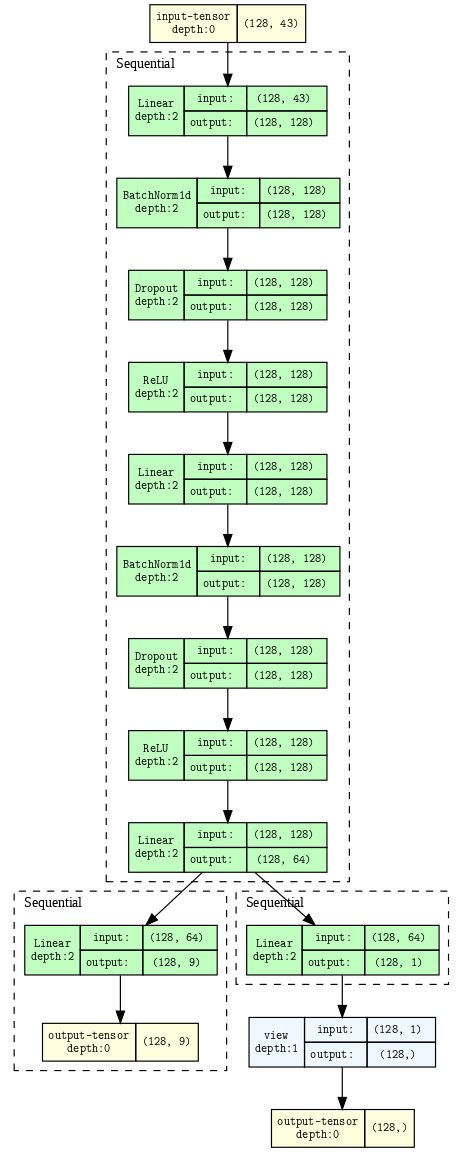

In [64]:
# Визаулизация 
from torchview import draw_graph # метод для визуализации архитектуры

model_graph = draw_graph(
    model, input_size=[cfg.batch_size, cfg.num_features], expand_nested=True
)
model_graph.visual_graph

In [65]:
# Заново инициализируем классы во избежании ошибок
optimizer = torch.optim.Adam(model.parameters(), lr=cfg.lr)
regression_criterion = nn.MSELoss().to(cfg.device)
classification_criterion = nn.CrossEntropyLoss().to(cfg.device)
writer = SummaryWriter() 

In [66]:
model_ft = train_model(
    model,
    dataloaders_dict,
    regression_criterion,
    classification_criterion,
    optimizer,
    num_epochs=cfg.epochs,
)

Epoch 0/39
----------
train Loss: 2.6078
val Loss: 2.6739
Epoch 2/39
----------
train Loss: 1.8800
val Loss: 1.7751
Epoch 4/39
----------
train Loss: 1.4477
val Loss: 1.3949
Epoch 6/39
----------
train Loss: 1.2755
val Loss: 1.2279
Epoch 8/39
----------
train Loss: 1.1484
val Loss: 1.1478
Epoch 10/39
----------
train Loss: 1.1107
val Loss: 1.1315
Epoch 12/39
----------
train Loss: 1.0646
val Loss: 1.1114
Epoch 14/39
----------
train Loss: 1.0363
val Loss: 1.0891
Epoch 16/39
----------
train Loss: 0.9909
val Loss: 1.0704
Epoch 18/39
----------
train Loss: 0.9558
val Loss: 1.0546
Epoch 20/39
----------
train Loss: 0.9206
val Loss: 1.0247
Epoch 22/39
----------
train Loss: 0.9244
val Loss: 1.0263
Epoch 24/39
----------
train Loss: 0.8422
val Loss: 0.9803
Epoch 26/39
----------
train Loss: 0.8223
val Loss: 0.9430
Epoch 28/39
----------
train Loss: 0.8061
val Loss: 0.8908
Epoch 30/39
----------
train Loss: 0.7334
val Loss: 0.8969
Epoch 32/39
----------
train Loss: 0.7117
val Loss: 0.8713
Ep

In [67]:
# Закрываем task
task.close() # можем занять несколько минут!

<div class="alert alert-info">

Теперь мы можем сравнить два эскперимента, выбрав их галочкой и нажав `Compare`:

![ClearML Compare](https://i.imgur.com/0Gyd7yL.png)

# <center id=5> 📝 Подведём итоги </center>

<div class="alert alert-success">


* Запустили свой первый эксперимент в `ClearML` за 2 строчки кода 💯
* Залогировали модель, ничего не делая 😜
* Умеем сравнивать модели, не ломая глаза

<div class="alert alert-info">

+ С помощью `ClearML` можно логировать обучение любых **ML** и **DL** моделей.
+ Фрэймворк поддерживается большинством популярных библиотек машинного обучения.
+ Это стартовый ноутбук, полный функционал изучим в следующих модулях.